In [23]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Part 1

In [1]:
# 1.1 Data Loading

In [9]:
# Task 1: Load the dataset food order.csv into a pandas DataFrame.
df = pd.read_csv('food_order.csv')
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [10]:
# Task 2: Display the first 10 rows of your dataset.
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


In [11]:
# 1.2 Data Description

In [12]:
# Task 3: Identify the data types for each feature (please do not eyeball it).
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [13]:
# Task 4: Write a function that calculates the ”null rate”for each column.
def null_rate(dataframe):
    # Task 4: Write a function that calculates the ”null rate”for each column.
    null_rates = dataframe.isnull().sum() / len(dataframe) * 100
    return null_rates

# This Calls the null_rate function and display the result
null_rates = null_rate(df)
null_rates

order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64

In [14]:
# Task 5: Identify the number of unique values for each column
unique_values = df.nunique()
unique_values

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

In [15]:
# 1.3 Data Manipulation

In [16]:
# Task 6: Add one column, total time, that is defined by the sum of food preparation time and delivery time.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [17]:
# 1.4 Satistics

In [18]:
# Task 7: Identify the different cusine types.
cuisine_types = df['cuisine_type'].unique()
cuisine_types

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [19]:
# Task 8: Find the number of restaurants per cuisine type. [1 mark]
restaurants_per_cuisine = df.groupby('cuisine_type')['restaurant_name'].nunique()
restaurants_per_cuisine

cuisine_type
American          41
Chinese           16
French             3
Indian            14
Italian           31
Japanese          29
Korean             5
Mediterranean      5
Mexican           11
Middle Eastern     7
Southern           2
Spanish            3
Thai               9
Vietnamese         3
Name: restaurant_name, dtype: int64

In [20]:
# 1.5 Visualization

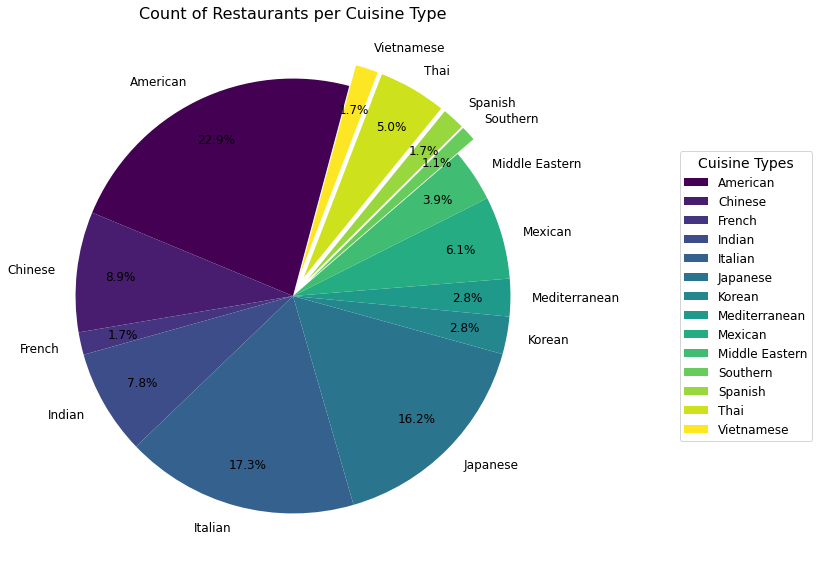

In [24]:
#Task 9: (a) Using your results from Task 8, and using a pie chart display the count of restaurants per cuisine type.
cuisine_count = len(restaurants_per_cuisine)
explode = [0.1 if i == 'Vietnamese' or i == 'Thai' or i == 'Spanish' or i == 'Southern' else 0 for i in restaurants_per_cuisine.index]

# Plot the pie chart for the count of restaurants per cuisine type
ax = restaurants_per_cuisine.plot(kind='pie', figsize=(14, 10), autopct='%1.1f%%', startangle=75, cmap='viridis', textprops={'fontsize': 12}, pctdistance=0.8, explode=explode)
ax.set_ylabel('')

# Set the title and legend
plt.title('Count of Restaurants per Cuisine Type', fontsize=16)
plt.legend(title='Cuisine Types', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=12, title_fontsize=14)

# Adjust the plot to avoid overlapping of the legend and pie chart
plt.subplots_adjust(left=0.1, right=0.7)

# Show the plot
plt.show()

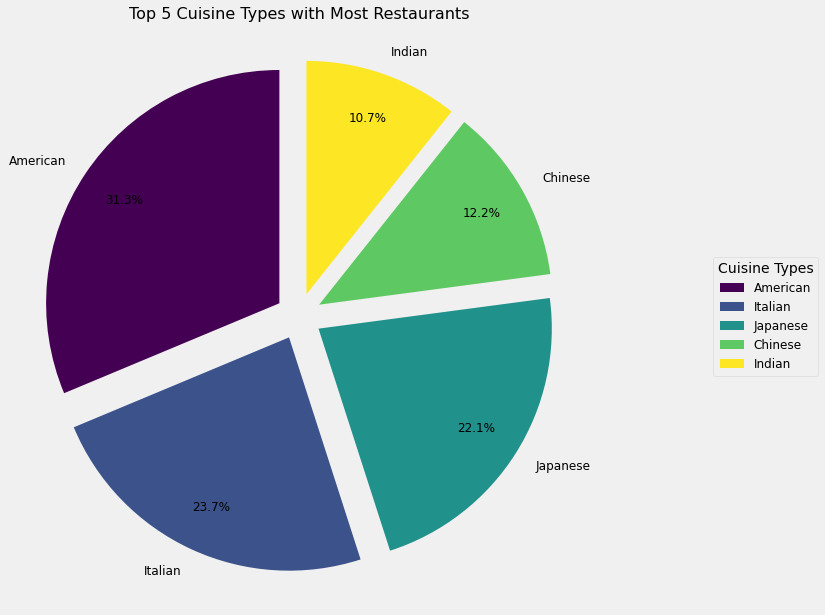

In [42]:
# Task 9: (b) Show only the 5 cuisine types with most restaurants.
top_5_cuisines = restaurants_per_cuisine.nlargest(5)

# Create an explode parameter for better visualization
explode = [0.1] * 5

# Plot the pie chart for the top 5 cuisine types with the most restaurants
ax = top_5_cuisines.plot(kind='pie', figsize=(14, 10), autopct='%1.1f%%', startangle=90, cmap='viridis', textprops={'fontsize': 12}, pctdistance=0.8, explode=explode)
ax.set_ylabel('')

# Set the title and legend
plt.title('Top 5 Cuisine Types with Most Restaurants', fontsize=16)
plt.legend(title='Cuisine Types', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=12, title_fontsize=14)

# Adjust the plot to avoid overlapping of the legend and pie chart
plt.subplots_adjust(left=0.1, right=0.7)
plt.style.use('fivethirtyeight')

# Show the plot
plt.show()

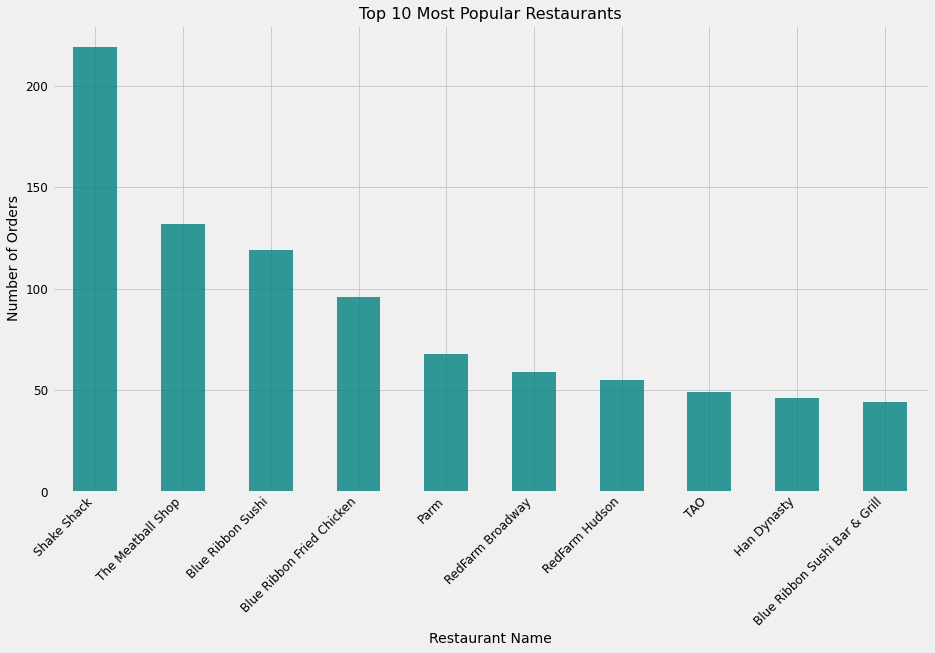

In [41]:
# Task 10: (a) Plot a graph that shows the 10 most popular restaurant name.

# Count the number of orders per restaurant
orders_per_restaurant = df['restaurant_name'].value_counts()

# Select the top 10 most popular restaurants
top_10_restaurants = orders_per_restaurant.nlargest(10)

# Plot the bar chart for the top 10 most popular restaurants
ax = top_10_restaurants.plot(kind='bar', figsize=(14, 8), color='teal', alpha=0.8)

# Set the title, xlabel, and ylabel
plt.title('Top 10 Most Popular Restaurants', fontsize=16)
plt.xlabel('Restaurant Name', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.style.use('fivethirtyeight')
plt.show()


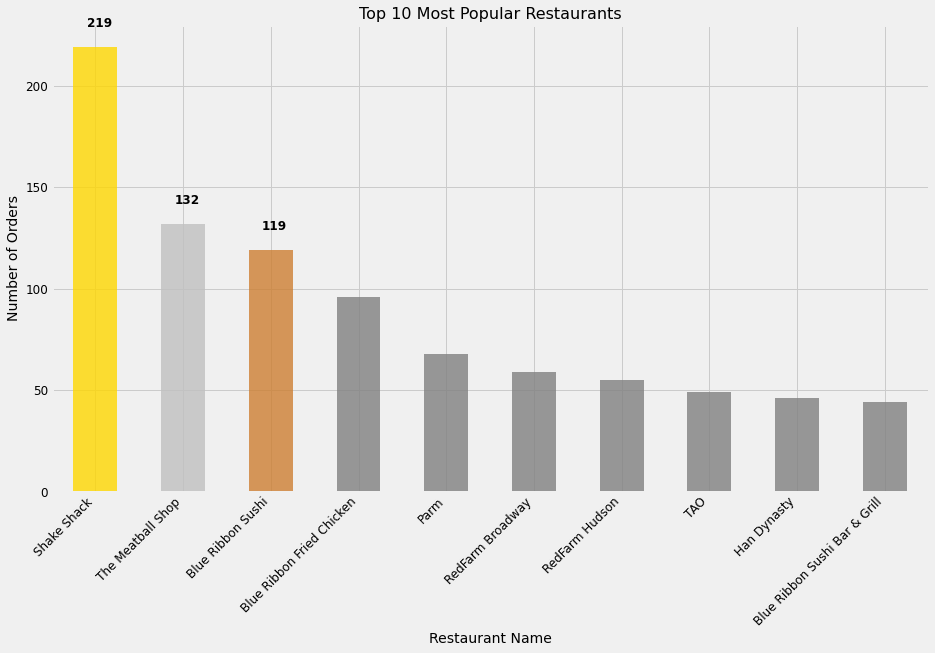

In [40]:
# Task 10: (b) Highlight the top 3.

# Plot the bar chart for the top 10 most popular restaurants
ax = top_10_restaurants.plot(kind='bar', figsize=(14, 8), color=['#FFD700', '#C0C0C0', '#CD7F32'] + ['#808080'] * 7, alpha=0.8)

# Set the title, xlabel, and ylabel
plt.style.use('fivethirtyeight')
plt.title('Top 10 Most Popular Restaurants', fontsize=16)
plt.xlabel('Restaurant Name', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add labels for the top 3 restaurants
for i, value in enumerate(top_10_restaurants.head(3)):
    ax.text(i - 0.1, value + 10, f'{value}', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

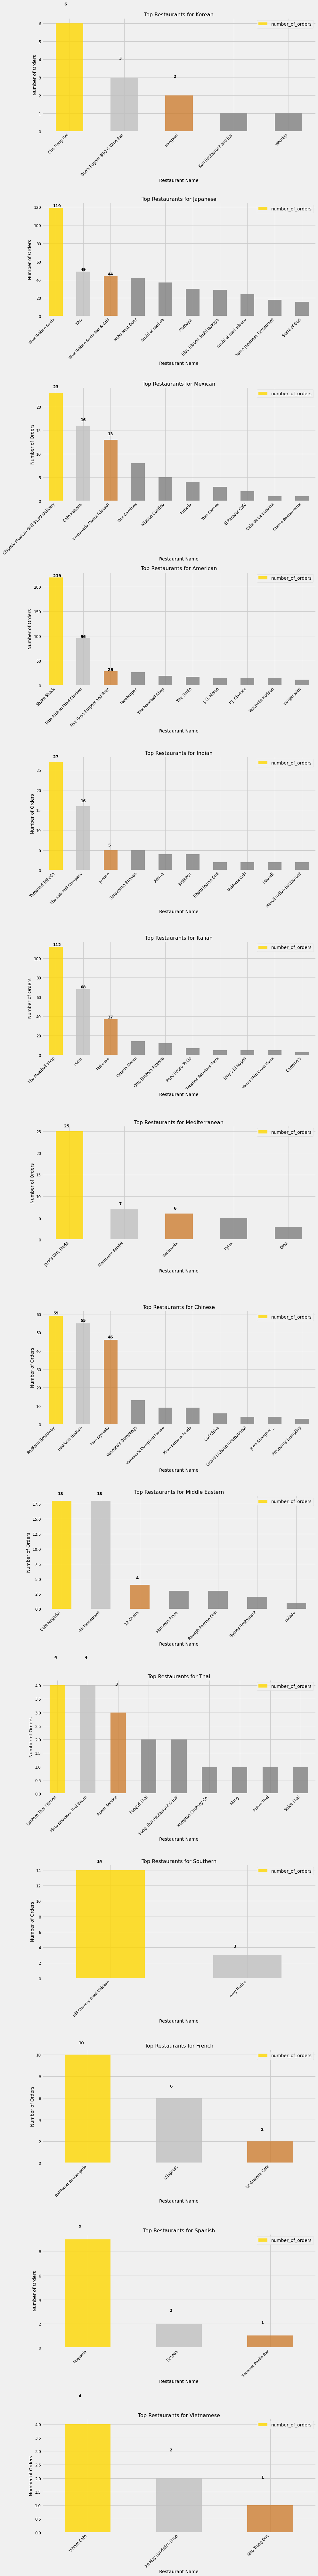

In [39]:
# Task 11: Plot a graph that shows the 10 most popular restaurants for each cuisine type and highlight the
# top 3. If there if less than 10 restaurants for a particular cuisine type, just show the maximum number of
# restaurants and highlight the top 3.

import numpy as np

# Replace non-standard ASCII characters in restaurant names with an empty string
df['restaurant_name'] = df['restaurant_name'].apply(lambda x: ''.join([c for c in x if ord(c) < 128]))

# Group the data by cuisine_type and restaurant_name and count the orders
grouped_data = df.groupby(['cuisine_type', 'restaurant_name']).size().reset_index(name='number_of_orders')

# Get the unique cuisine types
cuisine_types = df['cuisine_type'].unique()

# Set up the plotting area
fig, axes = plt.subplots(len(cuisine_types), 1, figsize=(14, 8 * len(cuisine_types)))
plt.style.use('fivethirtyeight')

# Iterate through each cuisine type and create a bar chart
for index, cuisine in enumerate(cuisine_types):
    # Filter the data for the current cuisine type
    filtered_data = grouped_data[grouped_data['cuisine_type'] == cuisine].nlargest(10, 'number_of_orders')
    
    # Plot the bar chart for the top restaurants
    ax = filtered_data.plot(kind='bar', x='restaurant_name', y='number_of_orders', ax=axes[index], color=['#FFD700', '#C0C0C0', '#CD7F32'] + ['#808080'] * 7, alpha=0.8)
    
    # Set the title, xlabel, and ylabel
    ax.set_title(f'Top Restaurants for {cuisine}', fontsize=16)
    ax.set_xlabel('Restaurant Name', fontsize=14)
    ax.set_ylabel('Number of Orders', fontsize=14)
    
    # Customize the tick labels
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add labels for the top 3 restaurants
    top_3 = filtered_data.head(3)
    for i, row in top_3.iterrows():
        ax.text(np.where(filtered_data['restaurant_name'] == row['restaurant_name'])[0][0] - 0.1, row['number_of_orders'] + 1, f"{row['number_of_orders']}", fontsize=12, fontweight='bold')
    
# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Task 12: (a) What is the proportion of reviews for Shake Shack?

# Count the number of orders for Shake Shack
shake_shack_orders = df[df['restaurant_name'] == 'Shake Shack'].shape[0]

# Calculate the total number of orders in the dataset
total_orders = df.shape[0]

# Calculate the proportion of reviews for Shake Shack
shake_shack_proportion = shake_shack_orders / total_orders

# Print the result
print(f"The proportion of reviews for Shake Shack is {shake_shack_proportion:.2%}")


The proportion of reviews for Shake Shack is 11.54%


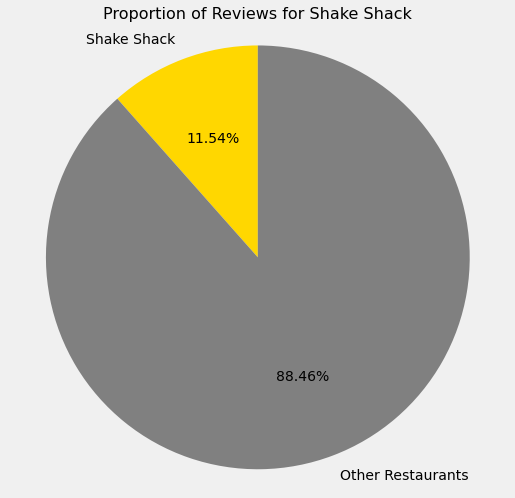

In [38]:
# Task 12: (b) Use a pie chart to display your results.

# Set the data for the pie chart
pie_data = [shake_shack_orders, total_orders - shake_shack_orders]
pie_labels = ['Shake Shack', 'Other Restaurants']

# Set the colors for the pie chart
colors = ['#FFD700', '#808080']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
plt.pie(pie_data, labels=pie_labels, colors=colors, autopct='%.2f%%', startangle=90)

# Set the title
plt.title('Proportion of Reviews for Shake Shack', fontsize=16)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

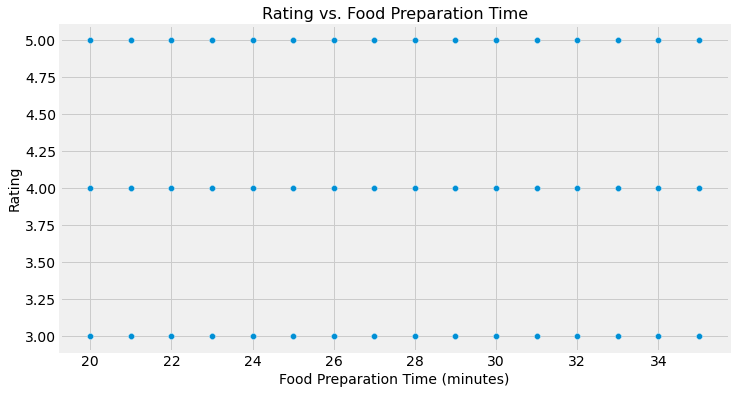

In [37]:
# Task 13: Is there a link between ratings and food preparation time? Justify your answer. You may use an
# appropriate graph.

import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')
# Create the scatter plot using seaborn
sns.scatterplot(data=df, x='food_preparation_time', y='rating', alpha=0.5)

# Set the title, xlabel, and ylabel
plt.title('Rating vs. Food Preparation Time', fontsize=16)
plt.xlabel('Food Preparation Time (minutes)', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Show the plot
plt.show()


- When you look at the scatter plot, you'll notice that there doesn't appear to be a strong pattern or trend between ratings and food preparation time. The data points are somewhat scattered across the entire range of food preparation times and ratings.

- If there was a strong relationship between these variables, we would expect to see a clear pattern in the scatter plot, such as a positive or negative linear trend. However, since the data points are dispersed without a noticeable trend, we can conclude that there is no strong link between ratings and food preparation time.

In [36]:
from scipy import stats

# Convert the 'rating' and 'food_preparation_time' columns to numeric data types
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')

# Drop the rows with NaN values in either 'rating' or 'food_preparation_time' columns
df_clean = df.dropna(subset=['rating', 'food_preparation_time'])

# Calculate the Pearson correlation coefficient
corr_coeff, p_value = stats.pearsonr(df_clean['rating'], df_clean['food_preparation_time'])

# Print the result
print(f"The Pearson correlation coefficient between ratings and food preparation time is {corr_coeff:.2f}")

The Pearson correlation coefficient between ratings and food preparation time is -0.01
